In [1]:
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

img_width=150
img_height=150
batch_size=20

C:\Users\usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
model=keras.applications.VGG19(weights="imagenet",include_top=False,
input_shape=(img_height,	img_width,	3))
#	Freeze	all	lower	layers		
for	layer	in	model.layers:
    layer.trainable	=	False
    #	add	custom	layers	
x	=	model.output
x	=	keras.layers.Flatten()(x)
x	=	keras.layers.Dense(64,	activation="relu")(x)
x	=	keras.layers.Dropout(0.2)(x)

output	=	keras.layers.Dense(1,	activation="sigmoid")(x)
print(model.summary())	
model_final	=	keras.models.Model(inputs=model.input,	outputs=output)	
model_final.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________

In [3]:
train_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	shear_range=0.2,		
zoom_range=0.2,	horizontal_flip=True)	
#	no	augmentation	for	testing:	rescaling	only	
valid_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)
test_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)	
	
#	a	generator	that	reads	images	found	in	'data/train',	and	generates	batches	of	augmented	image	data	
train_generator	=	train_datagen.flow_from_directory(	
								'./data/train',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	
#	this	is	a	similar	generator,	for	validation	data	
valid_generator	=	valid_datagen.flow_from_directory(	
								'./data/valid',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	


test_generator	=	test_datagen.flow_from_directory(	
						'./data/test',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,
shuffle=False,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	



Found 546 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [4]:
history	=model_final.fit_generator(	
train_generator,	
steps_per_epoch=2000	//	batch_size,	
								epochs=10,	
validation_data=valid_generator,	
validation_steps=2000	//	batch_size
)	

test_loss, test_acc=model_final.evaluate_generator(test_generator)

Epoch 1/10
100/100 [==============================] - 248s 2s/step - loss: 0.6965 - acc: 0.6641 - val_loss: 0.7348 - val_acc: 0.5320
Epoch 2/10
100/100 [==============================] - 244s 2s/step - loss: 0.4755 - acc: 0.7737 - val_loss: 0.7371 - val_acc: 0.5840
Epoch 3/10
100/100 [==============================] - 256s 3s/step - loss: 0.4032 - acc: 0.8076 - val_loss: 0.5494 - val_acc: 0.7165
Epoch 4/10
100/100 [==============================] - 261s 3s/step - loss: 0.3843 - acc: 0.8233 - val_loss: 0.7629 - val_acc: 0.6670
Epoch 5/10
100/100 [==============================] - 250s 3s/step - loss: 0.3465 - acc: 0.8472 - val_loss: 0.5416 - val_acc: 0.6675
Epoch 6/10
100/100 [==============================] - 250s 3s/step - loss: 0.2998 - acc: 0.8687 - val_loss: 0.5460 - val_acc: 0.6995
Epoch 7/10
100/100 [==============================] - 246s 2s/step - loss: 0.2916 - acc: 0.8627 - val_loss: 0.6071 - val_acc: 0.7005
Epoch 8/10
100/100 [==============================] - 268s 3s/step - 

In [16]:
print("[INFO] accuracy: {:.2f}%".format(test_acc * 100)) 
print("[INFO] Loss: ",test_loss)

[INFO] accuracy: 64.29%
[INFO] Loss:  0.8888540140220097


Text(0.5, 1.0, 'Loss Curves')

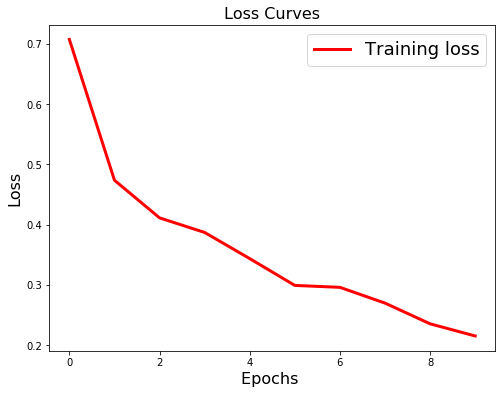

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
#plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1, 'Accuracy and Loss vs Epoch Curves')

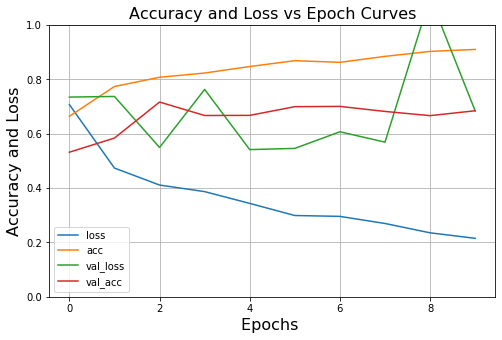

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))	
plt.grid(True)	
plt.gca().set_ylim(0,1)	
plt.savefig('vgg16')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy and Loss',fontsize=16)
plt.title('Accuracy and Loss vs Epoch Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

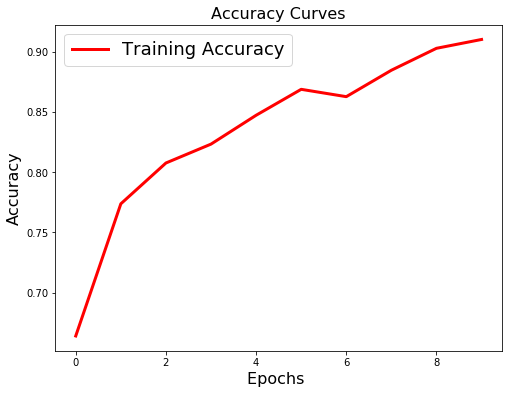

In [19]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
#plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model_final.predict_generator(test_generator)
y_pred = np.rint(predictions)
y_true = test_generator.classes

In [21]:
confmat=confusion_matrix(y_true, y_pred)

In [23]:
print('Classification Report')
y_test=y_true
target_names=['COVID_NO','COVID_YES']
print(classification_report(y_test, y_pred, target_names=target_names))

ac= accuracy_score(y_test,y_pred)
print(ac)

Classification Report
              precision    recall  f1-score   support

    COVID_NO       0.63      0.70      0.66        70
   COVID_YES       0.66      0.59      0.62        70

    accuracy                           0.64       140
   macro avg       0.64      0.64      0.64       140
weighted avg       0.64      0.64      0.64       140

0.6428571428571429


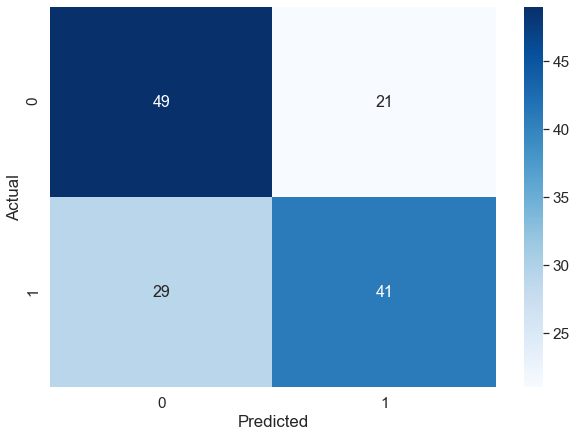

In [27]:
import seaborn as sn
cm=confmat
y_test=y_true
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,fmt='g',annot_kws={"size": 16})
plt.savefig('vgg19_cf')#

In [25]:
model_final.save('vgg19-trained-weights.h5')